<a href="https://colab.research.google.com/github/meganmeyerson1/Modeling-Food-Waste/blob/main/Food_Waste_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

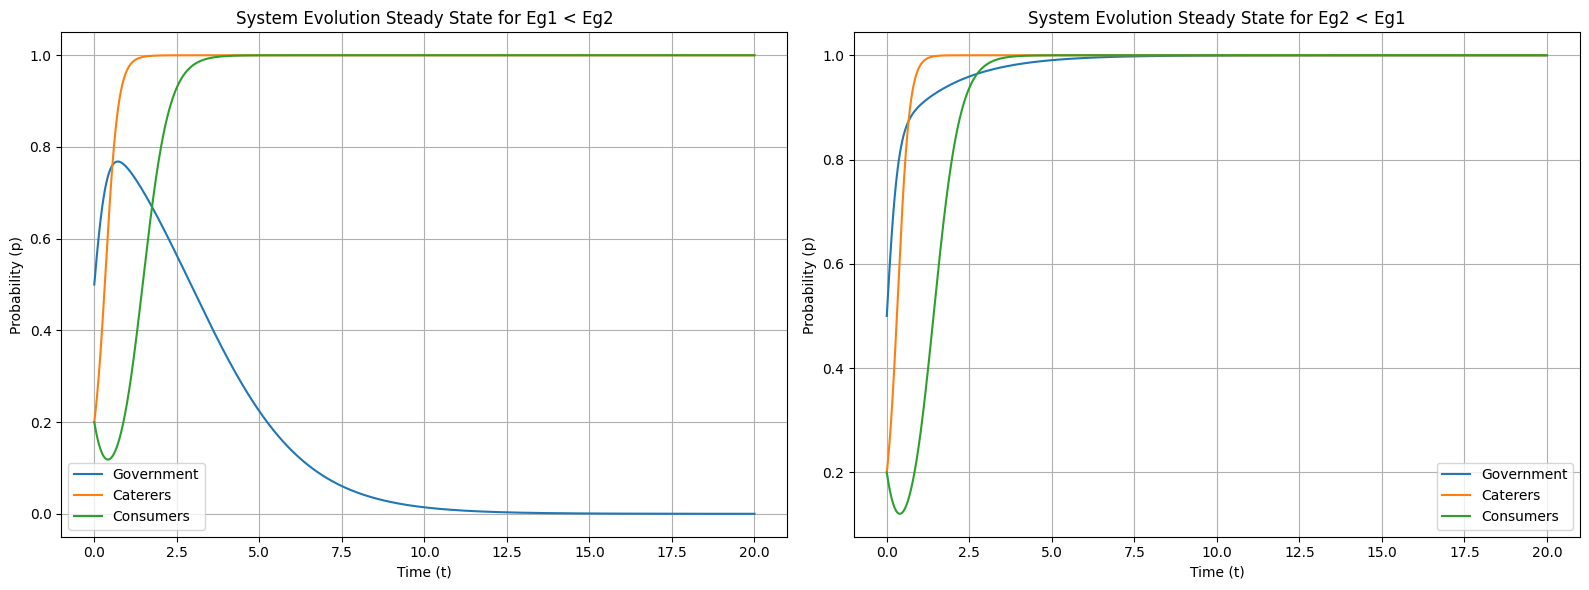

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the dynamical system
def system(u, t, alpha, A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2):
    x, y, z = u

    dxdt = x * (1 - x) * (((E_g1 - E_g2) + beta*H - y*alpha*A - (1 - y)*beta*F))
    dydt = y * (1 - y) * (-mu*c - p*s + e + E - z * epsilon * i + (1 - z)*epsilon*f + x*alpha*A + (1 - x) * beta*F)
    dzdt = z * (1 - z) * (y * epsilon * i + y * epsilon * f - 2 * y * (1 - mu) * W - 2 * (1 - y) * W + 2 * x * I1 + 2 * (1 - x) * I2)

    return [dxdt, dydt, dzdt]


    # Set parameters for the first case
alpha = 0.5
A = 20
F = 10
beta = 0.5
H = 20
E_g1 = 0.2
E_g2 = 0.8  # Different value for E_g2
mu = 0.5
c = 2
p = 0.5
s = 20
e = 2
E = 5
epsilon = 0.5
i = 2
f = 1
W = 5
I1 = 3
I2 = 3

# Set initial conditions
u0 = [0.5, 0.2, 0.2]

# Set time grid
t = np.linspace(0, 20, 100000)

# Solve the system for the first case
solution1 = odeint(system, u0, t, args=(alpha, A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2))

# Set parameters for the second case
E_g1 = 0.8  # Different value for E_g1
E_g2 = 0.2

# Solve the system for the second case
solution2 = odeint(system, u0, t, args=(alpha, A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2))

# Create two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for the first case
axes[0].plot(t, solution1[:, 0], label='Government')
axes[0].plot(t, solution1[:, 1], label='Caterers')
axes[0].plot(t, solution1[:, 2], label='Consumers')
axes[0].set_xlabel('Time (t)')
axes[0].set_ylabel('Probability (p)')
axes[0].legend()
axes[0].set_title('System Evolution Steady State for Eg1 < Eg2')
axes[0].grid(True)  # Add a grid to the first plot

# Plot for the second case
axes[1].plot(t, solution2[:, 0], label='Government')
axes[1].plot(t, solution2[:, 1], label='Caterers')
axes[1].plot(t, solution2[:, 2], label='Consumers')
axes[1].set_xlabel('Time (t)')
axes[1].set_ylabel('Probability (p)')
axes[1].legend()
axes[1].set_title('System Evolution Steady State for Eg2 < Eg1')

plt.grid(True)  # Add a grid to the second plot

plt.tight_layout()
plt.show()

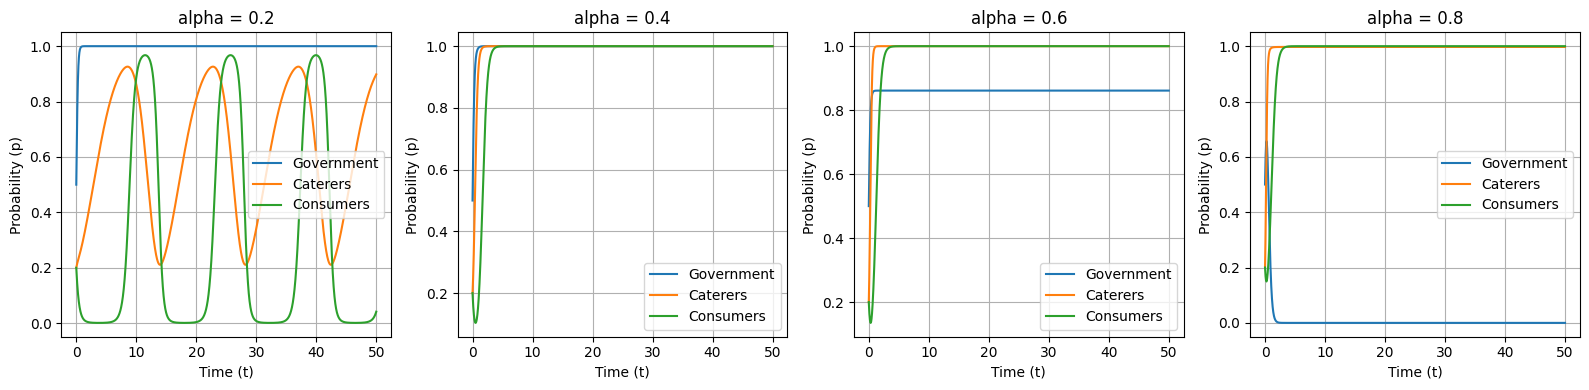

In [ ]:
##<<IS EG1 < EG2 FOR ALL THESE??>>
# Set common parameters
A = 20
F = 10
beta = 0.5
H = 20
E_g1 = 2
E_g2 = 0
mu = 0.5
c = 2
p = 0.5
s = 20
e = 2
E = 5
epsilon = 0.5
i = 2
f = 1
W = 5
I1 = 3
I2 = 3

# Set initial conditions
u0 = [0.5, 0.2, 0.2]

# Set time grid
t = np.linspace(0, 50, 100000)

# Define different alpha values
alpha_values = [0.2, 0.4, 0.6, 0.8]

# Create separate plots for each alpha value
plt.figure(figsize=(16, 4))

# Plot for alpha = 0.2
solution = odeint(system, u0, t, args=(alpha_values[0], A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2))
plt.subplot(141)
plt.plot(t, solution[:, 0], label='Government')
plt.plot(t, solution[:, 1], label='Caterers')
plt.plot(t, solution[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title(f'alpha = {alpha_values[0]}')
plt.grid(True)

# Plot for alpha = 0.4
solution = odeint(system, u0, t, args=(alpha_values[1], A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2))
plt.subplot(142)
plt.plot(t, solution[:, 0], label='Government')
plt.plot(t, solution[:, 1], label='Caterers')
plt.plot(t, solution[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title(f'alpha = {alpha_values[1]}')
plt.grid(True)

# Plot for alpha = 0.6
solution = odeint(system, u0, t, args=(alpha_values[2], A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2))
plt.subplot(143)
plt.plot(t, solution[:, 0], label='Government')
plt.plot(t, solution[:, 1], label='Caterers')
plt.plot(t, solution[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title(f'alpha = {alpha_values[2]}')
plt.grid(True)

# Plot for alpha = 0.8
solution = odeint(system, u0, t, args=(alpha_values[3], A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2))
plt.subplot(144)
plt.plot(t, solution[:, 0], label='Government')
plt.plot(t, solution[:, 1], label='Caterers')
plt.plot(t, solution[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title(f'alpha = {alpha_values[3]}')
plt.grid(True)

plt.tight_layout()
plt.show()


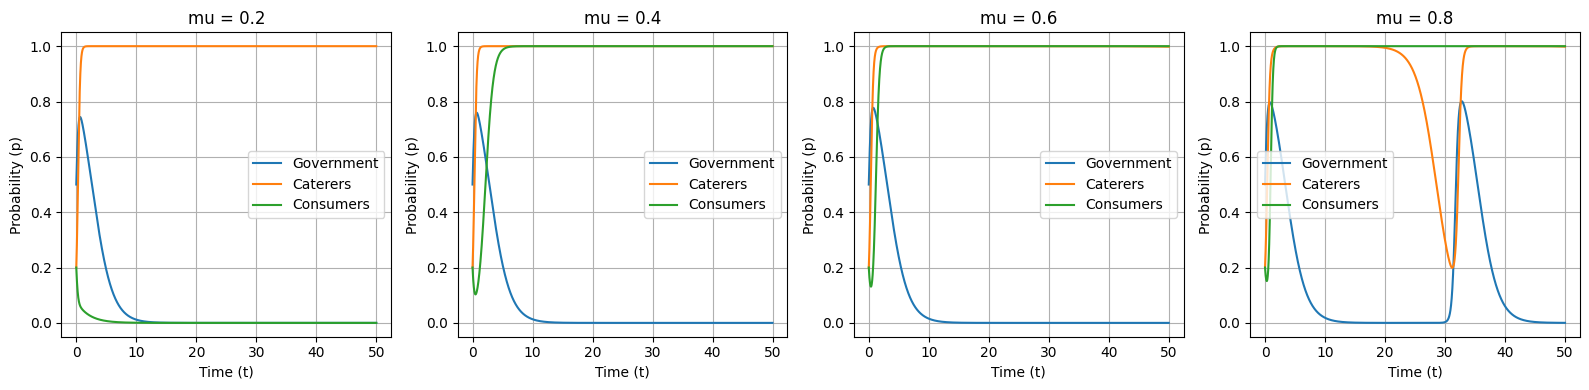

In [ ]:
#<<THIS IS THE ONLY SET OF GRAPHS WHERE EG2 > EG1>>

# Set common parameters
A = 20
F = 10
alpha = 0.5
H = 20
beta = 0.5
E_g1 = 0.2
E_g2 = 0.8
c = 2
p = 0.5
s = 20
e = 2
E = 5
epsilon = 0.5
i = 2
f = 1
W = 5
I1 = 3
I2 = 3

# Set initial conditions
u0 = [0.5, 0.2, 0.2]

# Set time grid
t = np.linspace(0, 50, 100000)

# Define different mu values
mu_values = [0.2, 0.4, 0.6, 0.8]

# Create separate plots for each mu value
plt.figure(figsize=(16, 4))

# Plot for mu = 0.2
solution = odeint(system, u0, t, args=(alpha, A, F, beta, H, E_g1, E_g2, mu_values[0], c, p, s, e, E, epsilon, i, f, W, I1, I2))
plt.subplot(141)
plt.plot(t, solution[:, 0], label='Government')
plt.plot(t, solution[:, 1], label='Caterers')
plt.plot(t, solution[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title(f'mu = {mu_values[0]}')
plt.grid(True)

# Plot for mu = 0.4
solution = odeint(system, u0, t, args=(alpha, A, F, beta, H, E_g1, E_g2, mu_values[1], c, p, s, e, E, epsilon, i, f, W, I1, I2))
plt.subplot(142)
plt.plot(t, solution[:, 0], label='Government')
plt.plot(t, solution[:, 1], label='Caterers')
plt.plot(t, solution[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title(f'mu = {mu_values[1]}')
plt.grid(True)

# Plot for mu = 0.6
solution = odeint(system, u0, t, args=(alpha, A, F, beta, H, E_g1, E_g2, mu_values[2], c, p, s, e, E, epsilon, i, f, W, I1, I2))
plt.subplot(143)
plt.plot(t, solution[:, 0], label='Government')
plt.plot(t, solution[:, 1], label='Caterers')
plt.plot(t, solution[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title(f'mu = {mu_values[2]}')
plt.grid(True)

# Plot for mu = 0.8
solution = odeint(system, u0, t, args=(alpha, A, F, beta, H, E_g1, E_g2, mu_values[3], c, p, s, e, E, epsilon, i, f, W, I1, I2))
plt.subplot(144)
plt.plot(t, solution[:, 0], label='Government')
plt.plot(t, solution[:, 1], label='Caterers')
plt.plot(t, solution[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title(f'mu = {mu_values[3]}')
plt.grid(True)

plt.tight_layout()
plt.show()


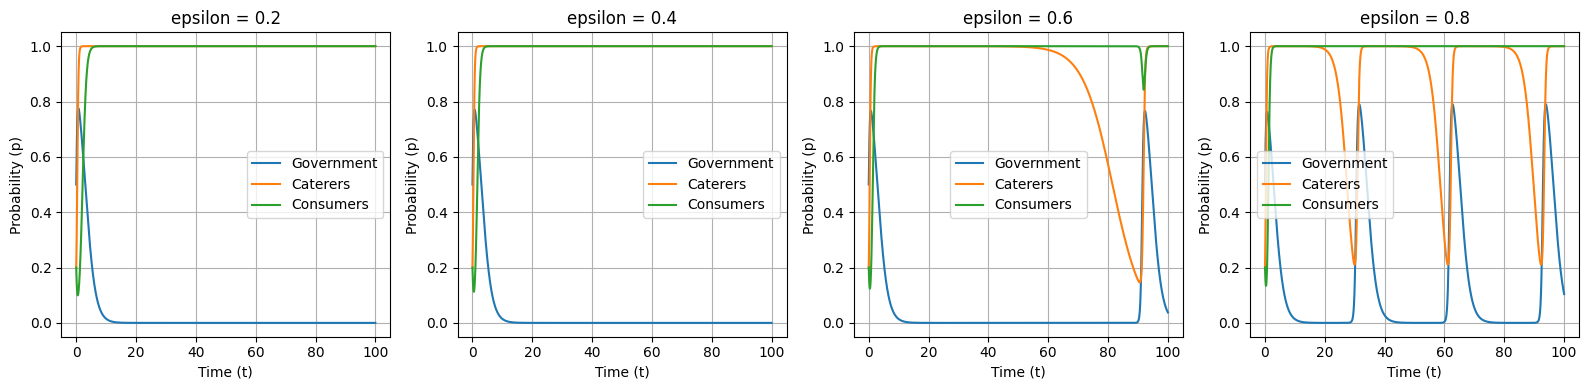

In [ ]:

# Set common parameters epsilon changing
A = 20
F = 10
alpha = 0.5
H = 20
E_g1 = 0.2
E_g2 = 0.8
mu = 0.5
c = 2
p = 0.5
s = 20
e = 2
E = 5
i = 2
f = 1
W = 5
I1 = 3
I2 = 3

# Set initial conditions
u0 = [0.5, 0.2, 0.2]

# Set time grid
t = np.linspace(0, 100, 100000)

# Define different epsilon values
epsilon_values = [0.2, 0.4, 0.6, 0.8]

# Create separate plots for each epsilon value
plt.figure(figsize=(16, 4))

# Plot for epsilon = 0.2
solution = odeint(system, u0, t, args=(alpha, A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon_values[0], i, f, W, I1, I2))
plt.subplot(141)
plt.plot(t, solution[:, 0], label='Government')
plt.plot(t, solution[:, 1], label='Caterers')
plt.plot(t, solution[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title(f'epsilon = {epsilon_values[0]}')
plt.grid(True)

# Plot for epsilon = 0.4
solution = odeint(system, u0, t, args=(alpha, A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon_values[1], i, f, W, I1, I2))
plt.subplot(142)
plt.plot(t, solution[:, 0], label='Government')
plt.plot(t, solution[:, 1], label='Caterers')
plt.plot(t, solution[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title(f'epsilon = {epsilon_values[1]}')
plt.grid(True)

# Plot for epsilon = 0.6
solution = odeint(system, u0, t, args=(alpha, A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon_values[2], i, f, W, I1, I2))
plt.subplot(143)
plt.plot(t, solution[:, 0], label='Government')
plt.plot(t, solution[:, 1], label='Caterers')
plt.plot(t, solution[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title(f'epsilon = {epsilon_values[2]}')
plt.grid(True)

# Plot for epsilon = 0.8
solution = odeint(system, u0, t, args=(alpha, A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon_values[3], i, f, W, I1, I2))
plt.subplot(144)
plt.plot(t, solution[:, 0], label='Government')
plt.plot(t, solution[:, 1], label='Caterers')
plt.plot(t, solution[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title(f'epsilon = {epsilon_values[3]}')
plt.grid(True)

plt.tight_layout()
plt.show()


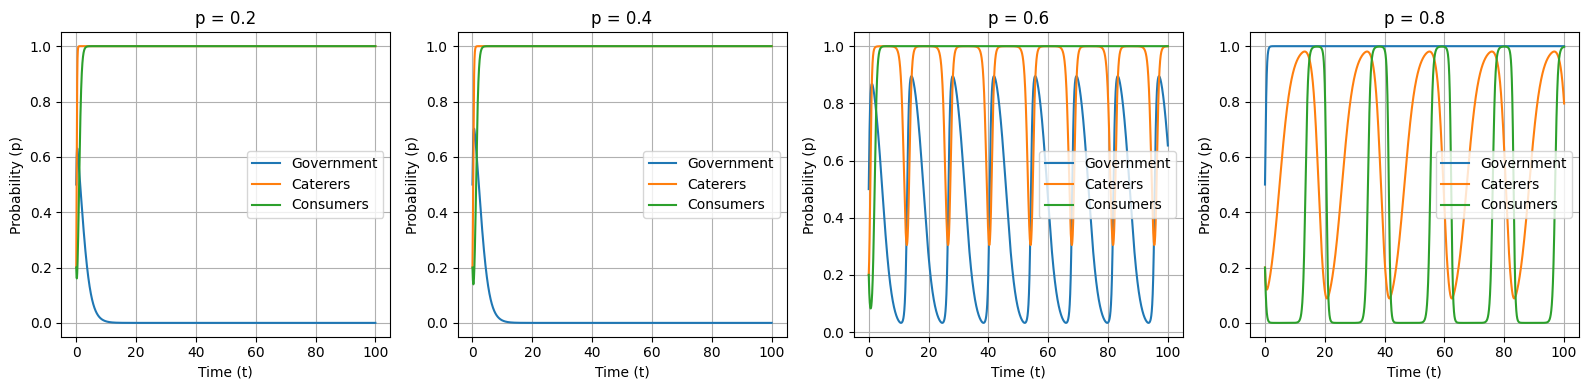

In [ ]:
# Set common parameters changing p
A = 20
F = 10
alpha = 0.5
beta =0.5
H = 20
E_g1 = 0.2
E_g2 = 0.8
mu = 0.5
c = 2
s = 20
e = 2
E = 5
epsilon = 0.5
i = 2
f = 1
W = 5
I1 = 3
I2 = 3

# Set initial conditions
u0 = [0.5, 0.2, 0.2]

# Set time grid
t = np.linspace(0, 100, 100000)

# Define different p values
p_values = [0.2, 0.4, 0.6, 0.8]

# Create separate plots for each p value
plt.figure(figsize=(16, 4))

# Plot for p = 0.2
solution = odeint(system, u0, t, args=(alpha, A, F, beta, H, E_g1, E_g2, mu, c, p_values[0], s, e, E, epsilon, i, f, W, I1, I2))
plt.subplot(141)
plt.plot(t, solution[:, 0], label='Government')
plt.plot(t, solution[:, 1], label='Caterers')
plt.plot(t, solution[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title(f'p = {p_values[0]}')
plt.grid(True)

# Plot for p = 0.4
solution = odeint(system, u0, t, args=(alpha, A, F, beta, H, E_g1, E_g2, mu, c, p_values[1], s, e, E, epsilon, i, f, W, I1, I2))
plt.subplot(142)
plt.plot(t, solution[:, 0], label='Government')
plt.plot(t, solution[:, 1], label='Caterers')
plt.plot(t, solution[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title(f'p = {p_values[1]}')
plt.grid(True)

# Plot for p = 0.6
solution = odeint(system, u0, t, args=(alpha, A, F, beta, H, E_g1, E_g2, mu, c, p_values[2], s, e, E, epsilon, i, f, W, I1, I2))
plt.subplot(143)
plt.plot(t, solution[:, 0], label='Government')
plt.plot(t, solution[:, 1], label='Caterers')
plt.plot(t, solution[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title(f'p = {p_values[2]}')
plt.grid(True)

# Plot for p = 0.8
solution = odeint(system, u0, t, args=(alpha, A, F, beta, H, E_g1, E_g2, mu, c, p_values[3], s, e, E, epsilon, i, f, W, I1, I2))
plt.subplot(144)
plt.plot(t, solution[:, 0], label='Government')
plt.plot(t, solution[:, 1], label='Caterers')
plt.plot(t, solution[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title(f'p = {p_values[3]}')
plt.grid(True)

plt.tight_layout()
plt.show()

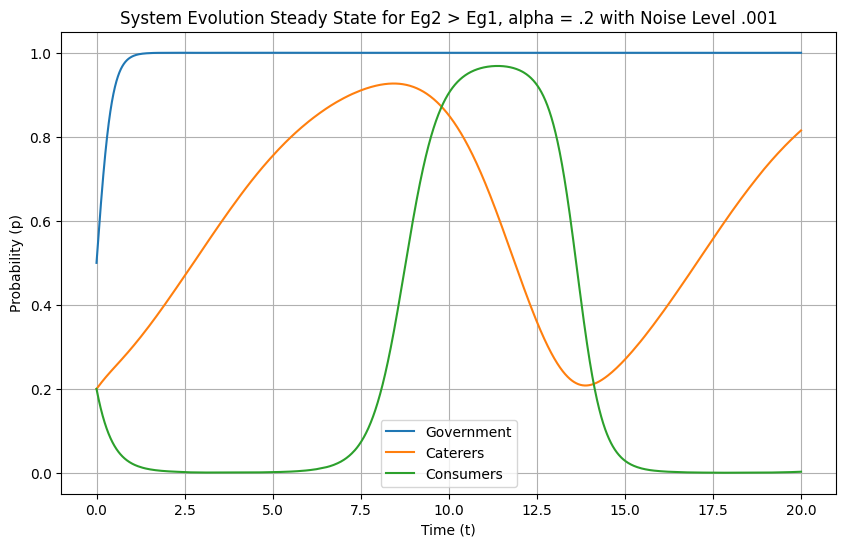

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2917: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


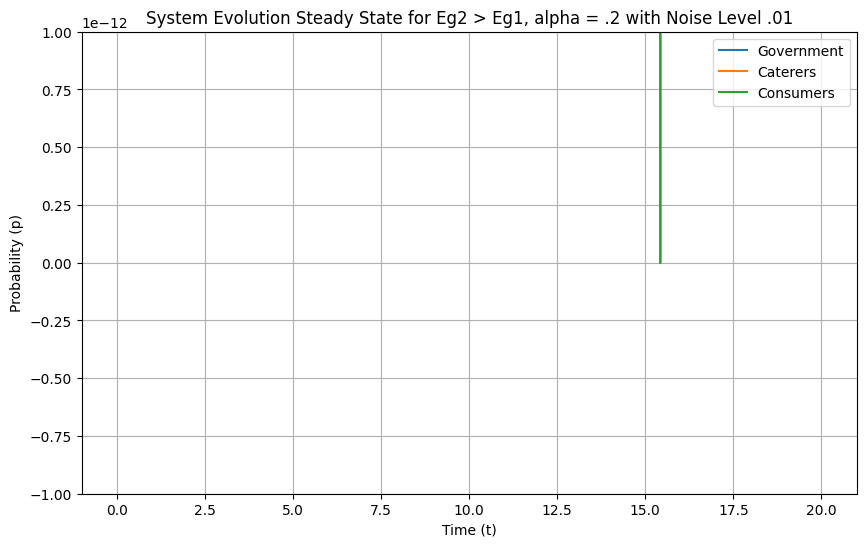

In [ ]:
#INTRODUCING NOISE!
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the dynamical system with noise
def system(u, t, alpha, A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2, noise_level):
    x, y, z = u

    # Generate random noise terms
    noise_x = noise_level * np.random.randn()
    noise_y = noise_level * np.random.randn()
    noise_z = noise_level * np.random.randn()

    dxdt = x * (1 - x) * (((E_g1 - E_g2) + beta*H - y*alpha*A - (1 - y)*beta*F)) + noise_x
    dydt = y * (1 - y) * (-mu*c - p*s + e + E - z * epsilon * i + (1 - z)*epsilon*f + x*alpha*A + (1 - x) * beta*F) + noise_y
    dzdt = z * (1 - z) * (y * epsilon * i + y * epsilon * f - 2 * y * (1 - mu) * W - 2 * (1 - y) * W + 2 * x * I1 + 2 * (1 - x) * I2) + noise_z

    return [dxdt, dydt, dzdt]

# Set parameters
alpha=.2
A = 20
F = 10
beta = .5
H = 20
E_g1 = 0.2
E_g2 = 0.8
mu = .5
c = 2
p = .5
s = 20
e = 2
E = 5
epsilon=0.5
i = 2
f = 1
W = 5
I1 = 3
I2 = 3

# Set initial conditions
u0 = [0.5, 0.2, 0.2]

# Set time grid
t = np.linspace(0, 20, 100000)

# Set noise level
noise_level = .001
#noise level .01 completely broke it
#noise level .001 does not affect

# Solve the system with noise
solution_with_noise = odeint(system, u0, t, args=(alpha, A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2, noise_level))

# Plot the results with noise
plt.figure(figsize=(10, 6))
plt.plot(t, solution_with_noise[:, 0], label='Government')
plt.plot(t, solution_with_noise[:, 1], label='Caterers')
plt.plot(t, solution_with_noise[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title('System Evolution Steady State for Eg2 > Eg1, alpha = .2 with Noise Level .001')
plt.grid(True)
plt.show()

# Set noise level
noise_level = .01
#noise level .01 completely broke it
#noise level .001 does not affect

# Solve the system with noise
solution_with_noise = odeint(system, u0, t, args=(alpha, A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2, noise_level))

# Plot the results with noise
plt.figure(figsize=(10, 6))
plt.plot(t, solution_with_noise[:, 0], label='Government')
plt.plot(t, solution_with_noise[:, 1], label='Caterers')
plt.plot(t, solution_with_noise[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title('System Evolution Steady State for Eg2 > Eg1, alpha = .2 with Noise Level .01')
plt.grid(True)
plt.show()


In [ ]:
# Set common parameters
A = 20
F = 10
alpha = 0.5
H = 20
beta = 0.5
E_g1 = 0.2
E_g2 = 0.8
c = 2
p = 0.5
s = 20
e = 2
E = 5
epsilon = 0.5
i = 2
f = 1
W = 5
I1 = 3
I2 = 3
mu = .8

# Set initial conditions
u0 = [0.5, 0.2, 0.2]

# Set time grid
t = np.linspace(0, 20, 100000)

# Set noise level
noise_level = .001

# Solve the system with noise
solution_with_noise = odeint(system, u0, t, args=(alpha, A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2, noise_level))

# Plot the results with noise
plt.figure(figsize=(10, 6))
plt.plot(t, solution_with_noise[:, 0], label='Government')
plt.plot(t, solution_with_noise[:, 1], label='Caterers')
plt.plot(t, solution_with_noise[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title('System Evolution Steady State for Eg2 > Eg1, mu = .8 with Noise Level .001')
plt.grid(True)
plt.show()

# Set noise level
noise_level = .01

# Solve the system with noise
solution_with_noise = odeint(system, u0, t, args=(alpha, A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2, noise_level))

# Plot the results with noise
plt.figure(figsize=(10, 6))
plt.plot(t, solution_with_noise[:, 0], label='Government')
plt.plot(t, solution_with_noise[:, 1], label='Caterers')
plt.plot(t, solution_with_noise[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title('System Evolution Steady State for Eg2 > Eg1, mu = .8 with Noise Level .01')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def system(u, t, alpha, A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2):
    x, y, z = u

    dxdt = x * (1 - x) * (((E_g1 - E_g2) + beta*H - y*alpha*A - (1 - y)*beta*F))
    dydt = y * (1 - y) * (-mu*c - p*s + e + E - z * epsilon * i + (1 - z)*epsilon*f + x*alpha*A + (1 - x) * beta*F)
    dzdt = z * (1 - z) * (y * epsilon * i + y * epsilon * f - 2 * y * (1 - mu) * W - 2 * (1 - y) * W + 2 * I1 + 2 * (1 - x) * I2)

    return [dxdt, dydt, dzdt]

def conserved_quantity(y, z, A, alpha, mu, c, p, s, E, e, epsilon, i, f, W, I1, I2):
    return (y/(1-y))**(2*I1-2*W)*(1-y)**(-2*W*mu)*(z/(1-z))**(-A*alpha+c*mu+p*s-E-e)*(z*(1-y))**(-epsilon*f)*((1-z)*(1-y))**(-epsilon*i)

# Parameters
A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2 = 20, 10, 0.5, 20, 2, 0, 0.5, 2, 0.5, 20, 2, 5, 0.5, 2, 1, 5, 3, 3
u0 = [0.5, 0.2, 0.2]
t = np.linspace(0, 50, 100000)

# Integrate the system for alpha = 0.2
alpha_value = 0.2
solution = odeint(system, u0, t, args=(alpha_value, A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2))

# Compute the normalized conserved quantity
y_final = conserved_quantity(solution[-1, 1], solution[-1, 2], A, alpha_value, mu, c, p, s, E, e, epsilon, i, f, W, I1, I2)
normalized_conserved = conserved_quantity(solution[:, 1], solution[:, 2], A, alpha_value, mu, c, p, s, E, e, epsilon, i, f, W, I1, I2) / y_final

# Plot results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot x, y, z
ax1.plot(t, solution[:, 0], label='Government', color='red')
ax1.plot(t, solution[:, 1], label='Caterers', color='green')
ax1.plot(t, solution[:, 2], label='Consumers', color='blue')
ax1.set_xlabel('Time (t)')
ax1.set_ylabel('Probability')
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot the normalized conserved quantity
ax2 = ax1.twinx()
ax2.plot(t, normalized_conserved, color='black', label='Normalized Conserved Quantity')
ax2.set_ylabel('Normalized Conserved Quantity')
ax2.legend(loc='upper right')

plt.title(f'System and Normalized Conserved Quantity for alpha = {alpha_value}')
fig.tight_layout()
plt.show()

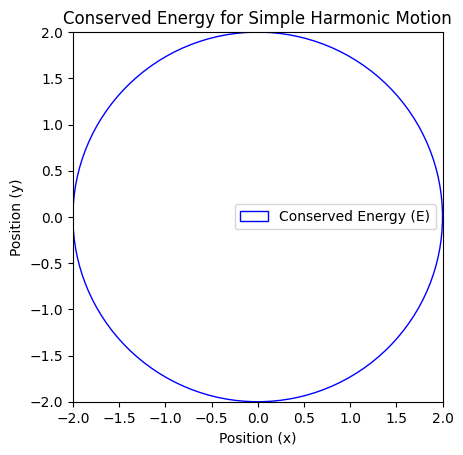

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the SHM
k = 4.0  # Spring constant
A = 2.0  # Amplitude of oscillation

# Calculate the conserved quantity (E) for the circle
E = 0.5 * k * A**2  # Total mechanical energy of SHM

# Create a figure and axis
fig, ax = plt.subplots()

# Create a circle with radius representing the conserved energy
circle = plt.Circle((0, 0), np.sqrt(2*E/k), color='blue', fill=False, label='Conserved Energy (E)')

# Add the circle to the plot
ax.add_artist(circle)

# Set the axis limits based on the energy value
ax.set_xlim(-A, A)
ax.set_ylim(-A, A)

# Add labels and legend
plt.title('Conserved Energy for Simple Harmonic Motion')
plt.xlabel('Position (x)')
plt.ylabel('Position (y)')
plt.legend()

# Display the plot

plt.gca().set_aspect('equal', adjustable='box')
plt.show()


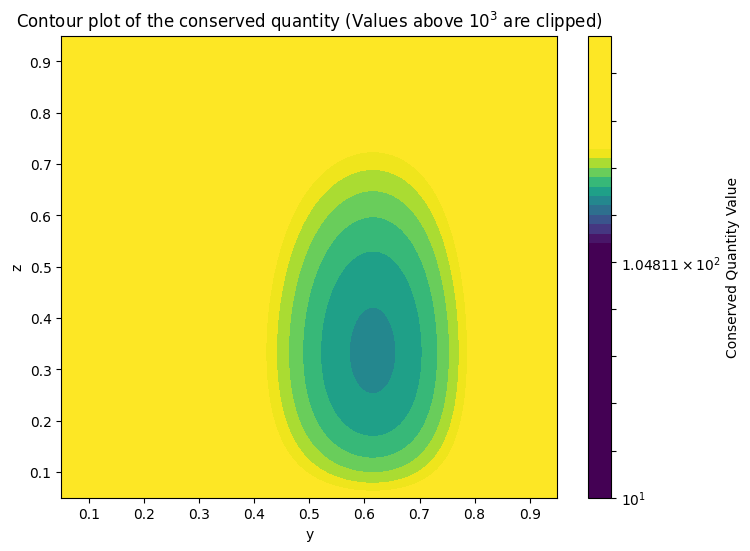

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def conserved_quantity(y, z, A, alpha, mu, c, p, s, E, e, epsilon, i, f, W, I1, I2):
    return (y/(1-y))**(2*I1-2*W)*(1-y)**(-2*W*mu)*(z/(1-z))**(-A*alpha+c*mu+p*s-E-e)*(z*(1-y))**(-epsilon*f)*((1-z)*(1-y))**(-epsilon*i)

# Parameters
A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2 = 20, 10, 0.5, 20, 2, 0, 0.5, 2, 0.5, 20, 2, 5, 0.5, 2, 1, 5, 3, 3
alpha_value = 0.2
delta = 0.05  # Magic number

# Create a grid of y and z values
y_values, z_values = np.meshgrid(np.linspace(delta, 1-delta, 400), np.linspace(delta, 1-delta, 400))

# Evaluate the conserved quantity for the grid of values
conserved_grid = conserved_quantity(y_values, z_values, A, alpha_value, mu, c, p, s, E, e, epsilon, i, f, W, I1, I2)

# Clip values above 10^3
conserved_grid_clipped = np.clip(conserved_grid, None, 10**3)
vmin=10**(2.1)
vmax=10**(2.5)
# Plotting
plt.figure(figsize=(8, 6))
contour = plt.contourf(y_values, z_values, conserved_grid_clipped, levels=np.logspace(1, 3, 50), cmap="viridis", norm=LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar(contour, label="Conserved Quantity Value")
plt.xlabel('y')
plt.ylabel('z')
plt.title('Contour plot of the conserved quantity (Values above $10^3$ are clipped)')
plt.show()

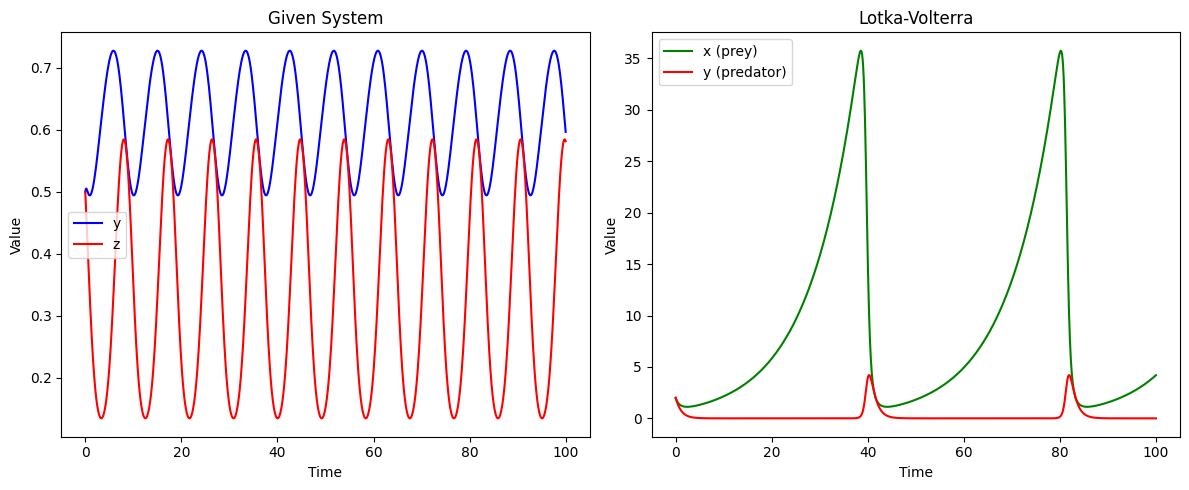

<ipython-input-3-3773c5e35da3>:21: RuntimeWarning: divide by zero encountered in divide
  return (y/(1-y))**(2*I1-2*W)*(1-y)**(-2*W*mu)*(z/(1-z))**(-A*alpha+c*mu+p*s-E-e)*(z*(1-y))**(-epsilon*f)*((1-z)*(1-y))**(-epsilon*i)
<ipython-input-3-3773c5e35da3>:21: RuntimeWarning: divide by zero encountered in power
  return (y/(1-y))**(2*I1-2*W)*(1-y)**(-2*W*mu)*(z/(1-z))**(-A*alpha+c*mu+p*s-E-e)*(z*(1-y))**(-epsilon*f)*((1-z)*(1-y))**(-epsilon*i)
<ipython-input-3-3773c5e35da3>:21: RuntimeWarning: invalid value encountered in multiply
  return (y/(1-y))**(2*I1-2*W)*(1-y)**(-2*W*mu)*(z/(1-z))**(-A*alpha+c*mu+p*s-E-e)*(z*(1-y))**(-epsilon*f)*((1-z)*(1-y))**(-epsilon*i)
<ipython-input-3-3773c5e35da3>:21: RuntimeWarning: divide by zero encountered in reciprocal
  return (y/(1-y))**(2*I1-2*W)*(1-y)**(-2*W*mu)*(z/(1-z))**(-A*alpha+c*mu+p*s-E-e)*(z*(1-y))**(-epsilon*f)*((1-z)*(1-y))**(-epsilon*i)
/usr/local/lib/python3.10/dist-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a m

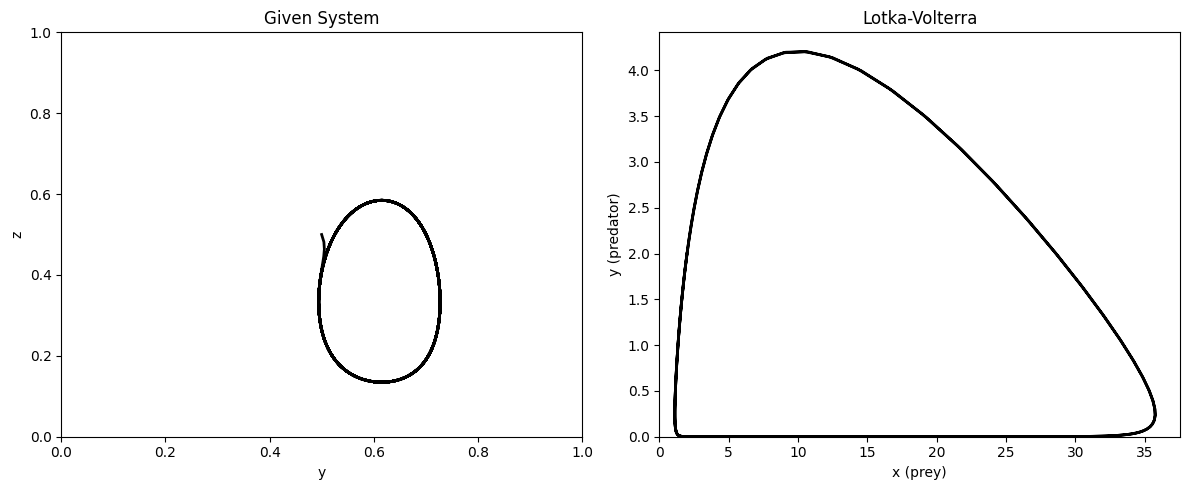

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.colors import BoundaryNorm

# Functions
def system(u, t, alpha, A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2):
    x, y, z = u
    dxdt = x * (1 - x) * (((E_g1 - E_g2) + beta*H - y*alpha*A - (1 - y)*beta*F))
    dydt = y * (1 - y) * (-mu*c - p*s + e + E - z * epsilon * i + (1 - z)*epsilon*f + x*alpha*A + (1 - x) * beta*F)
    dzdt = z * (1 - z) * (y * epsilon * i + y * epsilon * f - 2 * y * (1 - mu) * W - 2 * (1 - y) * W + 2 * x * I1 + 2 * (1 - x) * I2)
    return [dxdt, dydt, dzdt]

def lotka_volterra(u, t, alpha, beta, gamma, delta):
    x, y = u
    dxdt = alpha*x - beta*x*y
    dydt = delta*x*y - gamma*y
    return [dxdt, dydt]

def conserved_quantity(y, z, A, alpha, mu, c, p, s, E, e, epsilon, i, f, W, I1, I2):
    return (y/(1-y))**(2*I1-2*W)*(1-y)**(-2*W*mu)*(z/(1-z))**(-A*alpha+c*mu+p*s-E-e)*(z*(1-y))**(-epsilon*f)*((1-z)*(1-y))**(-epsilon*i)

def lv_conserved(x, y, alpha, beta, gamma, delta):
    return delta * np.log(x) + gamma * np.log(y) - beta * x - alpha * y

# Parameters
alpha_system, A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2 = 0.2, 20, 10, 0.5, 20, 2, 0, 0.5, 2, 0.5, 20, 2, 5, 0.5, 2, 1, 5, 3, 3
alpha_lv, beta_lv, gamma_lv, delta_lv = 0.1, 0.4, 1.0, 0.1

# Time grid
t = np.linspace(0, 100, 1000)

# Initial conditions
u0_system = [0.5, 0.5, 0.5]
u0_lv = [2, 2]

# Solving ODEs
solution_system = odeint(system, u0_system, t, args=(alpha_system, A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2))
solution_lv = odeint(lotka_volterra, u0_lv, t, args=(alpha_lv, beta_lv, gamma_lv, delta_lv))

# Plotting typical oscillatory trajectories
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t, solution_system[:, 1], label='y', color='blue')
plt.plot(t, solution_system[:, 2], label='z', color='red')
plt.legend()
plt.title('Given System')
plt.xlabel('Time')
plt.ylabel('Value')

plt.subplot(1, 2, 2)
plt.plot(t, solution_lv[:, 0], label='x (prey)', color='green')
plt.plot(t, solution_lv[:, 1], label='y (predator)', color='red')
plt.legend()
plt.title('Lotka-Volterra')
plt.xlabel('Time')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

# Contour plots
plt.figure(figsize=(12, 5))

# Custom colormap
cmap = plt.get_cmap('RdBu_r')
bounds = [-np.inf, 0, 1, np.inf]
norm = BoundaryNorm(bounds, cmap.N)

# Your system
y_values, z_values = np.meshgrid(np.linspace(0, 1, 400), np.linspace(0, 1, 400))
conserved_grid_system = conserved_quantity(y_values, z_values, A, alpha_system, mu, c, p, s, E, e, epsilon, i, f, W, I1, I2)
max_conserved = np.max(conserved_grid_system)
min_conserved = np.min(conserved_grid_system)
conserved_grid_system_transformed = (conserved_grid_system - min_conserved) / (max_conserved - min_conserved)

plt.subplot(1, 2, 1)
plt.contour(y_values, z_values, conserved_grid_system_transformed, levels=20, cmap=cmap, norm=norm)
plt.plot(solution_system[:, 1], solution_system[:, 2], color='black', lw=2)
plt.title('Given System')
plt.xlabel('y')
plt.ylabel('z')

# Lotka-Volterra
x_values, y_values = np.meshgrid(np.linspace(0, 4, 400), np.linspace(0, 4, 400))
conserved_grid_lv = lv_conserved(x_values, y_values, alpha_lv, beta_lv, gamma_lv, delta_lv)
max_conserved_lv = np.max(conserved_grid_lv)
min_conserved_lv = np.min(conserved_grid_lv)
conserved_grid_lv_transformed = (conserved_grid_lv - min_conserved_lv) / (max_conserved_lv - min_conserved_lv)

plt.subplot(1, 2, 2)
plt.contour(x_values, y_values, conserved_grid_lv_transformed, levels=20, cmap=cmap, norm=norm)
plt.plot(solution_lv[:, 0], solution_lv[:, 1], color='black', lw=2)
plt.title('Lotka-Volterra')
plt.xlabel('x (prey)')
plt.ylabel('y (predator)')

plt.tight_layout()
plt.show()

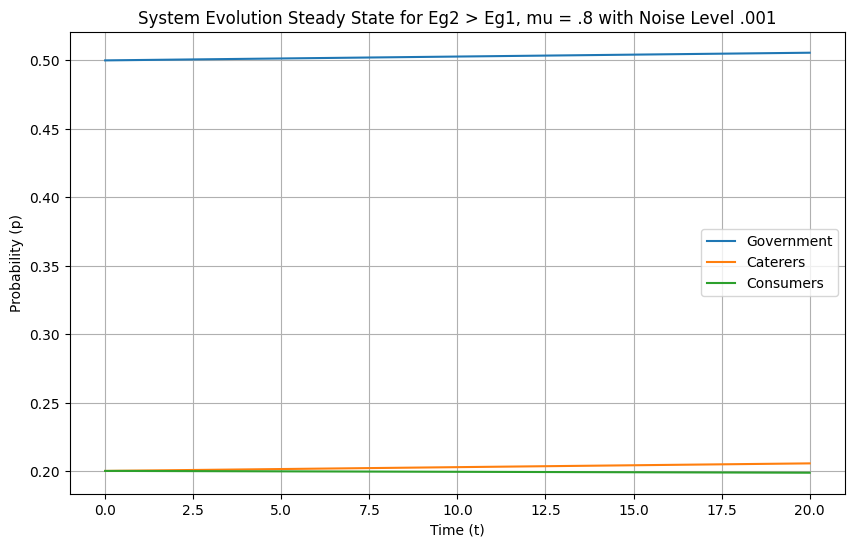

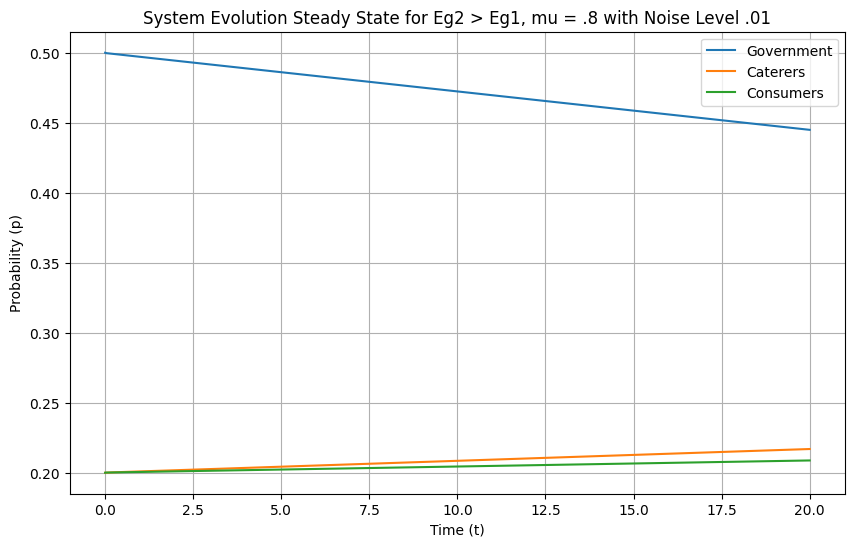

In [4]:
#Adding noise multiplicatively to mu = .8 graphs:

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the dynamical system with noise
def system(u, t, alpha, A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2, noise_level):
    x, y, z = u

    # Generate random noise terms
    noise_x = noise_level * np.random.randn()
    noise_y = noise_level * np.random.randn()
    noise_z = noise_level * np.random.randn()

    dxdt =(x * (1 - x) * (((E_g1 - E_g2) + beta*H - y*alpha*A - (1 - y)*beta*F)))*noise_x
    dydt = (y * (1 - y) * (-mu*c - p*s + e + E - z * epsilon * i + (1 - z)*epsilon*f + x*alpha*A + (1 - x) * beta*F))*noise_y
    dzdt = (z * (1 - z) * (y * epsilon * i + y * epsilon * f - 2 * y * (1 - mu) * W - 2 * (1 - y) * W + 2 * x * I1 + 2 * (1 - x) * I2))*noise_z

    return [dxdt, dydt, dzdt]

# Set common parameters
A = 20
F = 10
alpha = 0.5
H = 20
beta = 0.5
E_g1 = 0.2
E_g2 = 0.8
c = 2
p = 0.5
s = 20
e = 2
E = 5
epsilon = 0.5
i = 2
f = 1
W = 5
I1 = 3
I2 = 3
mu = .8

# Set initial conditions
u0 = [0.5, 0.2, 0.2]

# Set time grid
t = np.linspace(0, 20, 100000)

# Set noise level
noise_level = .001

# Solve the system with noise
solution_with_noise = odeint(system, u0, t, args=(alpha, A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2, noise_level))

# Plot the results with noise
plt.figure(figsize=(10, 6))
plt.plot(t, solution_with_noise[:, 0], label='Government')
plt.plot(t, solution_with_noise[:, 1], label='Caterers')
plt.plot(t, solution_with_noise[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title('System Evolution Steady State for Eg2 > Eg1, mu = .8 with Noise Level .001')
plt.grid(True)
plt.show()

# Set noise level
noise_level = .01

# Solve the system with noise
solution_with_noise = odeint(system, u0, t, args=(alpha, A, F, beta, H, E_g1, E_g2, mu, c, p, s, e, E, epsilon, i, f, W, I1, I2, noise_level))

# Plot the results with noise
plt.figure(figsize=(10, 6))
plt.plot(t, solution_with_noise[:, 0], label='Government')
plt.plot(t, solution_with_noise[:, 1], label='Caterers')
plt.plot(t, solution_with_noise[:, 2], label='Consumers')
plt.xlabel('Time (t)')
plt.ylabel('Probability (p)')
plt.legend()
plt.title('System Evolution Steady State for Eg2 > Eg1, mu = .8 with Noise Level .01')
plt.grid(True)
plt.show()